In [1]:
from leapfrog import leapfrog, angular_momentum
from Mice import initialize_system, simulate
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

M = 1 # in solar masses
G = 4491.9 # kpc^3 / (M * T^2) where  solar masses and T = 10^8 years
dt = 0.001 # .1T
T = 25 # total time in 25*T where T=10e8 years 
step = int(T/dt) # total number of steps, should be INT
center, system = initialize_system()
out_star, out_satellite, out_star_v, out_satellite_v = simulate(center, system, step, dt, G, M)

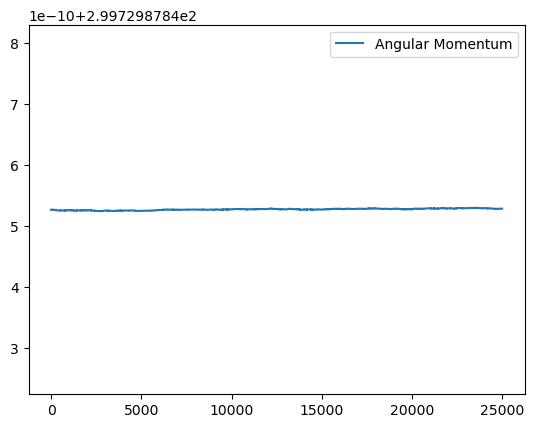

In [2]:
mass_star = M 
mass_satellite = 1e-35
L_total_over_time = angular_momentum(out_star, out_satellite, out_star_v, out_satellite_v, mass_star, mass_satellite)
plt.plot(np.array([i for i in range(len(L_total_over_time))]), L_total_over_time, label = r'Angular Momentum')
plt.legend()
plt.show()

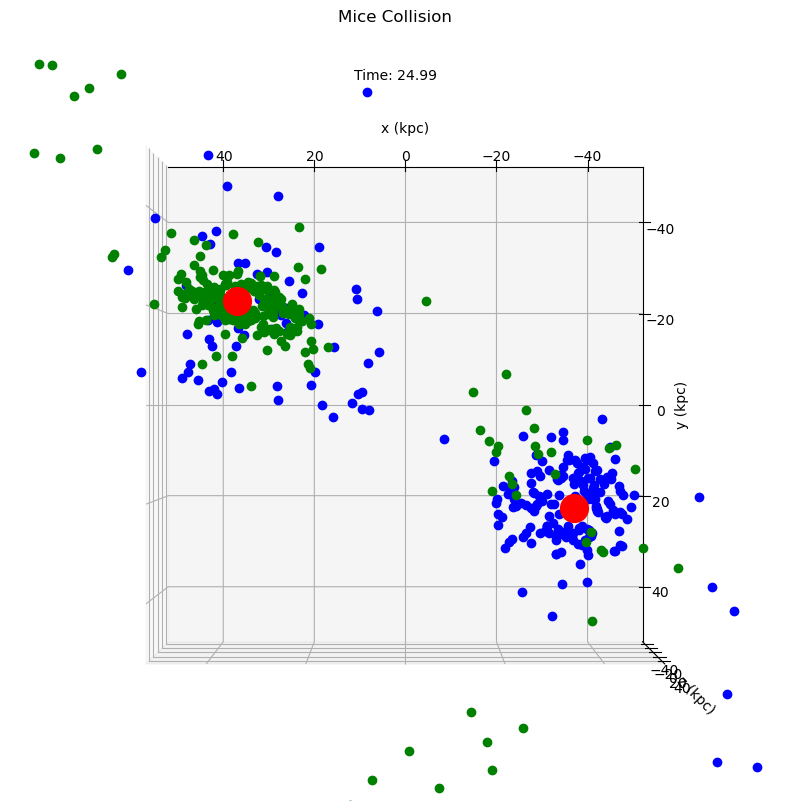

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming out_satellite and out_star are your data arrays
# and dt, step are defined variables

# Define the frame interval
frame_interval = 10

gal1 = []
gal2 = []
for i in range(out_satellite.shape[0]):    
    temp = out_satellite[i]
    newarr = np.array_split(temp, 2) # splitting the two galaxies
    gal1.append(newarr[0])
    gal2.append(newarr[1])
gal1 = np.array(gal1)
gal2 = np.array(gal2)

elev, azim = 90, 90

############# plotting satellites
# Create the figure and axes for the plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev, azim) # viewing angle
time_label = ax.text2D(0.5, 0.95, '', ha='center', va='top', transform=ax.transAxes)

# Create the initial point in the plot
point1, = ax.plot(gal1[0,:,0], gal1[0,:,1], gal1[0,:,2], 'bo')
point2, = ax.plot(gal2[0,:,0], gal2[0,:,1], gal2[0,:,2], 'bo')
point3, = ax.plot(out_star[0,:,0], out_star[0,:,1], out_star[0,:,2], 'bo')

# Define the update function for the animation
def update(frame):
    # Calculate the actual frame to use
    actual_frame = frame * frame_interval

    # for stars from galaxy 1
    point1.set_data(gal1[actual_frame][:,0], gal1[actual_frame][:,1])
    point1.set_3d_properties(gal1[actual_frame][:,2])
    point1.set_color('blue')

    # for stars from galaxy 2
    point2.set_data(gal2[actual_frame][:,0], gal2[actual_frame][:,1])
    point2.set_3d_properties(gal2[actual_frame][:,2])
    point2.set_color('green')

    # for cores
    point3.set_data(out_star[actual_frame][:,0], out_star[actual_frame][:,1])
    point3.set_3d_properties(out_star[actual_frame][:,2])
    point3.set_color('red')
    point3.set_ms(20) # set marker size

    # time label
    time = actual_frame * dt
    time_label.set_text(f'Time: {time:.2f}')  # Format the time value with 2 decimal places
    return point1, point2, point3,

# Create the animation object with frames being every frame_interval row
anim = FuncAnimation(fig, update, frames=range(0, step//frame_interval), blit=True, interval=1)

ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.set_zlabel("z (kpc)")
ax.set_title('Mice Collision')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_zlim(-50,50)
anim.save('animation.mp4', writer='ffmpeg')